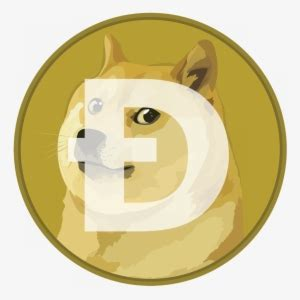

# feed forward ➡ recurrent loop

- left image: a super basic feed forward cell with a single scalar input (x), output (y), weight (w), and bias, and a sigmoid activation function (not important for now, could be anything).
- middle: you can loop the output back ot the cell for a cool recursive effect, but how to combine that with the input? multiply the output by a new weight (w') , then add it to the (w*x) and the bias (b).
- right: just some added notation to help visualize that you need a delay in the recursive loop equal to (at least) one timestep. so the recursive input $y^{<0>}$ is from the previous timestep compared to the normal input ($x^{<1>}$).

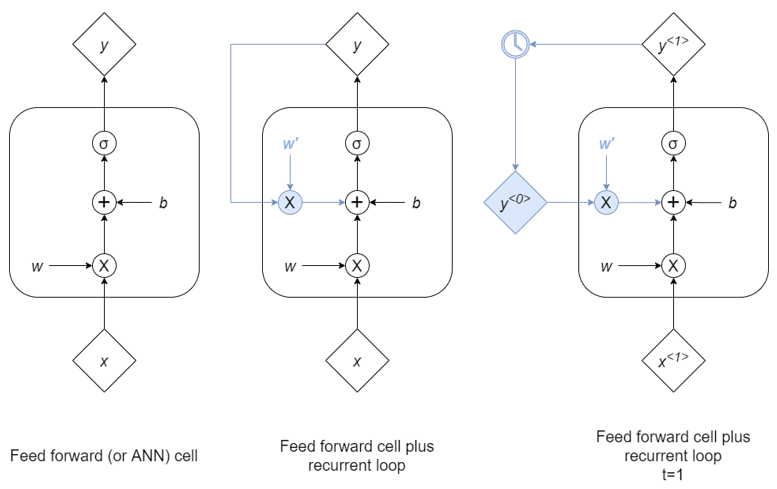

## recurrent cell

- left image: here we just change the notation again. instead of a recursive arrow, we use notation $y^{<1>}$ and $y^{<2>}$ to show what the next timestep ($x^{<2>}$ would look like, also we drop the output down to the right of the cell (convention).
- right: again a small notation change, generalizing to any $t$, and changing the names of the weights (convention). also $y$ becomes $a$ and we call it the hidden state, which is how an RNN cell can remember later in an input sequence (say at $x^{<10>}$) something tha happened earleir in the sequence (say $x^{<1>}$).

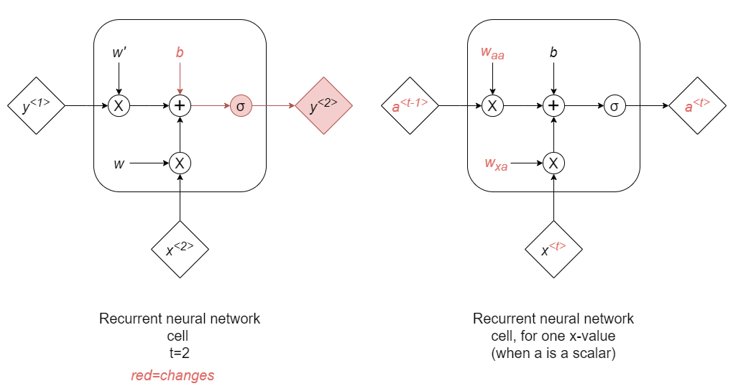

## recurrent neural network

- this next step isn't necessary, but is common, especially for regression problems. we take the hidden state ($a^{<t>}$ and give it to a basic feed forward cell. why?
  - if $a$ is a scalar, then after delivering sequence $x^{<0>}.. x^{<n>}$, we will have a scalar ($a$). 
  - if we choose $\mathbf{a}$ to be a vector (by making units>1) then we will always have a vector output. today we're doing only a single-point, scalar forecast (there are advantages and disadvantages to this). one way to get a scalar from a vector is to put it into a feed forward cell (with the right matrix and vector dimensions).

in addition the feed forward cell gives us more depth, or complexity to the model. in this simple example it almost doubles the number of parameters! but for large, or deep, recurrent networks the feed forward portion is a small percentage of the total paramters, by choice. 

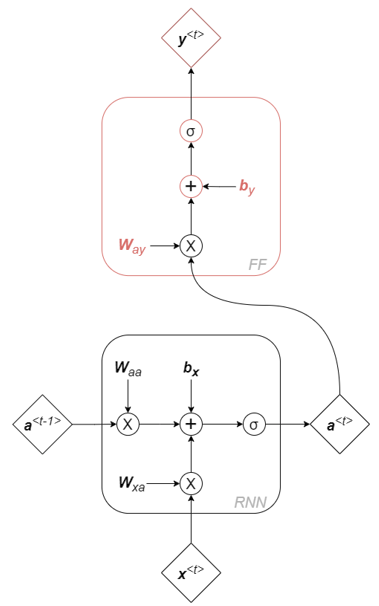

- looking now again at the network, let's formalize the math. we'll combine the recurrent cell and FF cell into a single blue cell (and this is common).

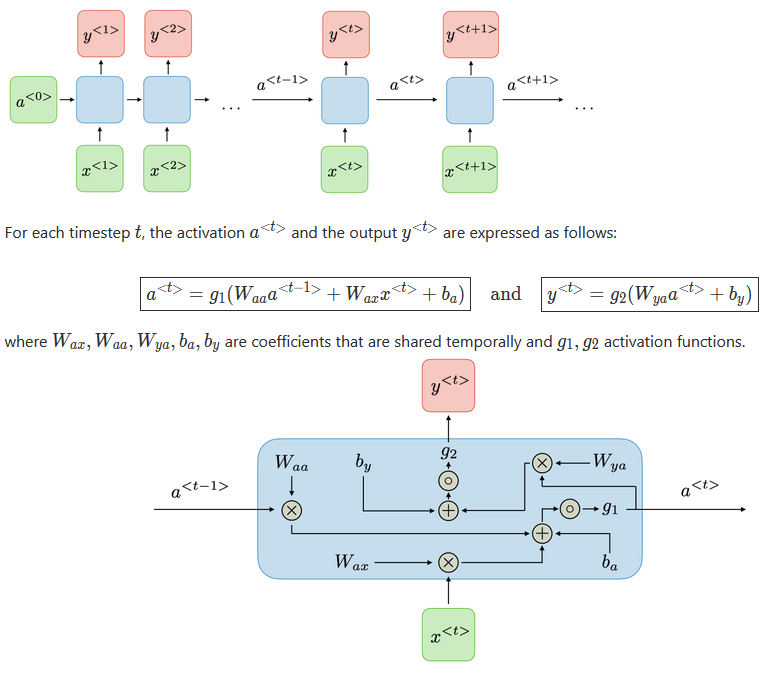

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks

- $x$ is easy: the input vector (e.g. days 0 through 13 of price data)
- $\hat{y}$ is also pretty easy: a single output value (e.g. day 14 of price data)
  - could also be a vector, but not the case for us
- $a$ is the hidden state vector (sometime called cell state)
  - length equals the number of rnn _units_




## numerical example
_all values are from 0 to 1_

model 
- window size = 2
- units = 1
- only calculate output at the end

init 
- $W_{aa} = 0.1$
- $W_{ax} = 0.2$
- $W_{ya} = 0.3$
- $b_{a} = 0.4$
- $b_{y} = 0.5$
- $x^{<1>} = 0.8$
- $x^{<2>} = 0.9$
- $a^{<0>}$ begins as random number = 0.5


at t = 1
1. $a^{<0>}$ is multiplied by weight $W_{aa}$ = 0.05
2. $x^{<1>}$ is multiplied by weight $W_{ax}$ = 0.16
3. Results from (1) and (2) are added to biases $b_a$ = 0.61
4. Result from 3 is put through the tanh function = 0.54
5. Result from 4 is the new hidden state $a^{<1>}$ = 0.54

at t = 2
6. $a^{<1>}$ is multiplied by weight $W_{aa}$ = 0.05
7. $x^{<2>}$ is multiplied by weight $W_{ax}$ = 0.18
8. Results from (6) and (7) are added to biases $b_a$ = 0.73
9. Result from 8 is put through the tanh function = 0.62
10. Result from 9 is the new hidden state $a^{<2>}$ = 0.62

final output
11. ${a}^{<2>}$ is multiplied by weights $W_{ya}$ = 0.19
12. Result from 11 added to biases $b_y$ = 0.69
13. Result from 12 put through softmax function = SM(0.69)
14. Result from 13 is the prediction $\hat{y}^{<2>}$ = SM(0.69)


note:
- in this exmpale the final output is only a direction function of ${a}^{<2>}$ (and the weights/biases), but in more complicated models the output could be calculated from all the other states (${a}^{<1>}$, ${a}^{<0>}$, etc)
- actually this image is incorrect because $W_{ya}$ and $b_y$ are not drawn but should be




# matlab ➡ python

python can be pretty similar to matlab. also i wrote some helper functions that will also make this notebook seem more like pseudo code. 

what you need to know for now:

1. packages are like toolboxes/libraries. they're just public code sets (and free) that we can load into our python environment and use. we often give packages a shorter name like `np` for numpy and `pd` for pandas.

2. `keras` and `tensorflow` are two of the most important packages for machine learning. we interact with keras, and tensorflow does the hard math in the background.

3. the package `pandas` is like excel for python. pandas dataframes are accessed with square brackets like `df['prices']` and `df['2021-1-26']`.

4. the `numpy` arrays (1D, 2D, etc..) and python lists are accessed almost exactly like matlab matrices except the "end" number in an index range (`begin:end`) is exclusive. also you don't need the first and last indices.

  ```python
  a = [0,1,2,3,4,5] # list
  a[3]   # 3
  a[0:3] # [0,1,2]
  a[:3]  # same ⬆
  a[3:6] # [3,4,5]
  a[3:]  # same ⬆
  ```

5. python is functional..

  ```python
  def add(a,b): # function
    return a+b

  add(1,2) # 3
  ```

6. .. and also objective

  ```python
  from numpy import array # class "array"
  A = array([ [1,2,3],
               [4,5,6] ])
  A.shape # (2,3)

  B = A.reshape(3,2) # method
  B.shape # (3,2)
  ```

7. etc: 
  - scripting lanugae (you don't compile)
  - no semi-colon at the end of lines
  - empty-space in the code has meaning so instead of finishing functions and loops with "end" you just un-indent
  - colab is amazing, use it

now the actual code.

# packages

In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from keras import Sequential as build_model     # not a typical renaming
from keras.layers import SimpleRNN as rnn_layer # " "
from keras.layers import Dense as ann_layer     # " "

from matplotlib.pyplot import plot, show, legend, xlabel, ylabel, title

# so we get the same results every time
np.random.seed(42) 
tf.random.set_seed(42)

## functions

feel welcome to ignore these.

In [ ]:
def import_data(filename):
  return pd.read_csv( filename, index_col=0, parse_dates=True )['2021']

def slide_window(k):
  global window_begin, window_end # nb: global variables are poor form.
  window_begin = window_begin + 1
  window_end = window_end + 1  

def convert_X_and_y_to_numpy():
  global X_train, y_train, X_test, y_test
  X_train,y_train = np.array(X_train), np.array(y_train) 
  X_test,y_test = np.array(X_test), np.array(y_test) 

def add_third_dimension_to_X():  
  global X_train, X_test, L_w
  # reshape X to proper 3D array
  X_train = X_train.reshape((len(X_train), L_w, 1)) 
  X_test = X_test.reshape((len(X_test), L_w, 1))   

def calc_lengths():
  global y_train, y_test, L_train, L_test, L
  L_train = len(y_train) 
  L_test  = len(y_test)
  L = L_train + L_test

def plot_train_subsets():
  global y_train, yhat_train
  rmse = np.sqrt(np.mean(np.square(y_train - yhat_train)))

  plot(y_train,    label='y_train')
  plot(yhat_train, label='yhat_train') # hat = estimated
  legend()
  xlabel('day of year 2021')
  ylabel('close price')
  #title(f'rmse (kW): {rmse:.3f}')  
  show()  

def plot_test_subsets():
  global y_test, yhat_test
  rmse = np.sqrt(np.mean(np.square(y_test - yhat_test)))

  plot(y_test,    label='y_test')
  plot(yhat_test, label='yhat_test') 
  legend()
  xlabel('day of year 2021')
  ylabel('close price')
  #title(f'rmse (kW): {rmse:.3f}')  
  show()  

def plot_train_loss():
  global history
  loss = history.history['loss'][10:]
  plot(range(10,len(loss)+10), loss, label='model loss')
  legend()
  xlabel('epochs after 10')
  ylabel('mse')
  show()  

# data

## import

need to upload `DOGE-USD.csv` to colab.

In [ ]:
df = import_data('DOGE-USD.csv')
df

# df = import_data('DOGE-USD.csv')
# df # colab will print this

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,2.289615e+08
2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3.421563e+09
2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2.707004e+09
2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1.372399e+09
2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,6.872561e+08
...,...,...,...,...,...,...
2021-11-24,0.226680,0.230245,0.211836,0.221825,0.221825,1.957665e+09
2021-11-25,0.217132,0.228810,0.214317,0.216326,0.216326,1.344827e+09
2021-11-26,0.221047,0.221759,0.190344,0.200887,0.200887,2.231733e+09


we'll focus only on the close price. 

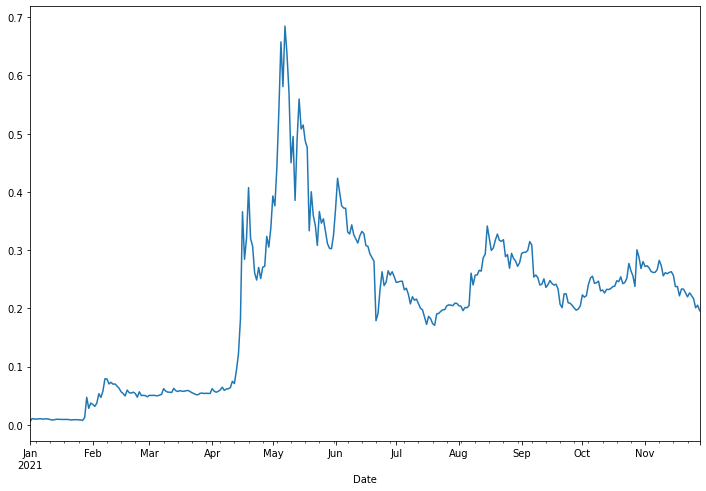

In [ ]:
prices = df['Close']
df['Close'].plot(figsize=(12,8))

# prices = df['Close']
# df['Close'].plot(figsize=(12,8))

## organize

the `train` subset will be the first 90% of the days in our dataset. then see how well it performs on the `test` subset, which is the remaining 10% of days. when we test the model it will be on data that it never saw during training, so we have a way to estimate how well the forecast would work for real.

In [ ]:
train = list(prices)[:300] # 90%
test = list(prices)[300:] # 10%

# train = list(prices)[:300] # first 90% of days
# test = list(prices)[300:]  # remaining 10% of days

we need to organize the train and test data such that the input $X$ to the model is 14 days of data, and the output $y$ is the 15th day. $X$ is a matrix where the first row is the first 14 day window, and the next row is the window _slid_ or shifted ahead one day, and so on. for a single-point forecast $y$ is just a vector.

forward pass throught the rnn model (🧠): 
- input ➡🧠➡ ouput

first input window and output:
- $(t_0, t_1, .. t_{12}, t_{13} ) $ ➡🧠➡ $t_{14}$

slide window ahead one day for next output:
- $(t_1, t_2, .. t_{13}, t_{14} ) $ ➡🧠➡ $t_{15}$

with $X$ and $\hat{y}$ notation it looks like:
- $ (X_{0,0}, X_{0,1} .. X_{0,12}, X_{0,13} )$ ➡🧠➡ $\hat{y_0}$

- $ (X_{1,0}, X_{1,1} .. X_{1,12}, X_{1,13} )$ ➡🧠➡ $\hat{y_1}$

- ...

- $ (X_{304,0}, X_{304,1} .. X_{304,12}, X_{304,13} )$ ➡🧠➡ $\hat{y}_{304}$

finally in matrix notation:

- $X$ ➡🧠➡ $\hat{y}$

same notation for a backward pass during training:

- $X$ ⬅💪(🧠)⬅ $y$

so the finally we see that:
- $X$ has the shape (`number_of_windows` , `window_length`)

- $\hat{y}$ and $y$ have the shape (`number_of_windows` , 1)


❗❗ one practical issue: $X$ is math but `X` is code, and tensorflow complains if `X` doesn't have a third dimension (the number of features). for us its 1, but we still need a 3D array. so actually: 
- `X` has the shape of (`number_of_windows` , `window_length` , `number_of_features`)

some differing nomenclature:
- window_length is also called sequence_length
- number_of_windows is also called number_of_samples or maybe number_of_batches

now, organize the train subset:

In [ ]:
L_w = 14 # window length (days)
X_train = [] # empty list
y_train = []

window_begin = 0                # t0..
window_end = window_begin + L_w #     ..t13

while window_end < len(train):
  window = train[window_begin:window_end] # nb: python indexing
  X_train.append(window)

  target = train[window_end]
  y_train.append(target)

  slide_window(1)


then the test subset:

In [ ]:
X_test = []
y_test = []

window_begin = 0
window_end = window_begin + L_w

while window_end < len(test):
  window = test[window_begin:window_end] # nb: python indexing
  X_test.append(window)

  target = test[window_end]
  y_test.append(target)

  slide_window(1)

some housekeeping:
- data must be in numpy arrays for tensorflow to use
- each input matrix/array must also have a 3-dimensional shape, even if there is only one feature (like we have)
- and later we'll want to know the length of the train and test arrays

In [ ]:
convert_X_and_y_to_numpy()
add_third_dimension_to_X()
calc_lengths()

# forecast model (units=1)

## build

build the model with an rnn main layer, and a final `ann` layer to reduce the output values to a single number. rnn _units_ may be a misleading name but is just the dimension of the cell state vector. _input shape_ is a matrix with dimensions (`window size` x `number of features`), but that's also a bit misleading because if you change the `window_size` the number of parameters doens't change, ie the model doesn't get any bigger. `n_features` is just 1 because we only have one data vector we're using as an input to the model, the close prices.

notice that the "model" is more than just a single rnn layer (or cell). there's the output layer, a loss metric you need to define, and a lot of other parameters we won't worry about now.

In [ ]:
units = 1
n_features = 1

model = build_model( [  rnn_layer(units, input_shape=(L_w, n_features)),
                        ann_layer(units=1)                               ] )

model.compile( loss='mse' )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## train

train/fit the model on the training data for 100 epochs (cycles throught the entire dataset). this will perform backpropagation through time.

In [ ]:
history = model.fit(X_train, y_train, epochs=100) # 100 cycles/trips through all 332 rows

# history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 5ms/step - loss: 0.0254
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0110
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 13/100
9/9 [==============================] - 0s 4ms/st

## predict

predict the results on the training and test data subsets. hat means estimated (by the rnn).

In [ ]:
yhat_train = model.predict(X_train)
yhat_test =  model.predict(X_test)

# yhat_train = model.predict(X_train)
# yhat_test =  model.predict(X_test)

## analysis

remember the training outputs `yhat_train` are made to be nearly equal to the real measurements `y_train` during training. so these two should be very close to each other if training was successful. 

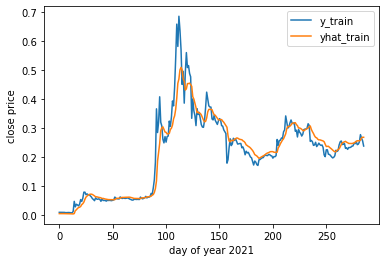

In [ ]:
plot_train_subsets()

the rnn model never saw the `y_test` data during training, so this is a good first attempt at seeing how well it forecasts new data. 

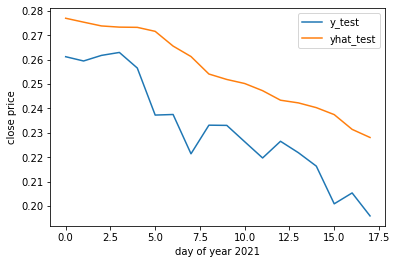

In [ ]:
plot_test_subsets()

_model loss_ is like the opposite of R^2 when you're doing a regression fit, in excel for instance. the lower the model loss, the better the _fit_ to the train data. 0 is possible but unlikely. mse is mean squared error, or RMSE^2.

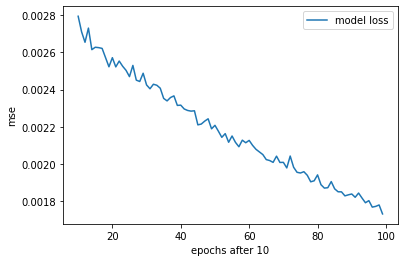

In [ ]:
plot_train_loss() # mse

# forecast model (units=10)

## build

build the model with an rnn main layer, and a final `ann` layer to reduce the output values to a single number. rnn _units_ may be a misleading name but is just the dimension of the cell state vector. _input shape_ is a matrix with dimensions (`window size` x `number of features`), but that's also a bit misleading because if you change the `window_size` the number of parameters doens't change, ie the model doesn't get any bigger. `n_features` is just 1 because we only have one data vector we're using as an input to the model, the close prices.

In [ ]:
units = 10
n_features = 1

model = build_model( [  rnn_layer(units, input_shape=(L_w,n_features)),
                        ann_layer(units=1)                               ] )

model.compile( loss='mse' )
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


## train

train/fit the model on the training data for 100 epochs (cycles throught the entire dataset). this will perform backpropagation through time.

In [ ]:
history = model.fit(X_train,y_train,epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 4ms/step - loss: 0.1482
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0276
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 13/100
9/9 [==============================] - 0s 4ms/st

## predict

predict the results on the training and test data subsets. hat means estimated (by the rnn).

In [ ]:
yhat_train = model.predict(X_train)
yhat_test =  model.predict(X_test)

## analysis

remember the training outputs `yhat_train` are made to be nearly equal to the real measurements `y_train` during training. so these two should be very close to each other if training was successful. 

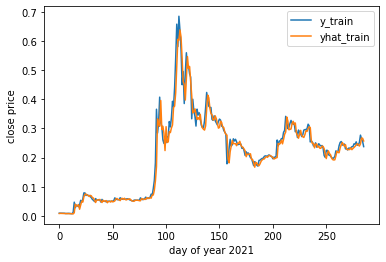

In [ ]:
plot_train_subsets()

the rnn model never saw the `y_test` data during training, so this is a good first attempt at seeing how well it forecasts new data. 

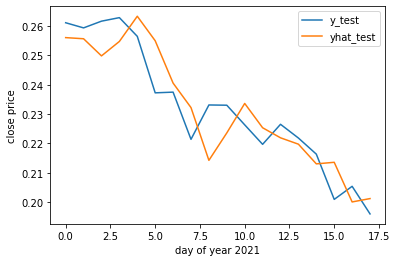

In [ ]:
plot_test_subsets()

_model loss_ is like the opposite of R^2 when you're doing a regression fit, in excel for instance. the lower the model loss, the better the _fit_ to the train data. 0 is possible but unlikely. mse is mean squared error, or RMSE^2.

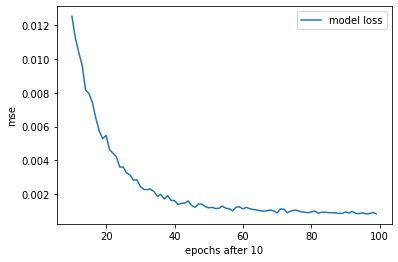

In [ ]:
plot_train_loss()